In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [3]:
öğrenci_performans = pd.read_csv("StudentsPerformance.csv")
öğrenci_performans.columns=['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
öğrenci_performans.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Ödev1
Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [5]:
öğrenci_performans["Toplam_notu"]=(öğrenci_performans["matematik_notu"]+öğrenci_performans["okuma_notu"]+öğrenci_performans["yazma_notu"])/3
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

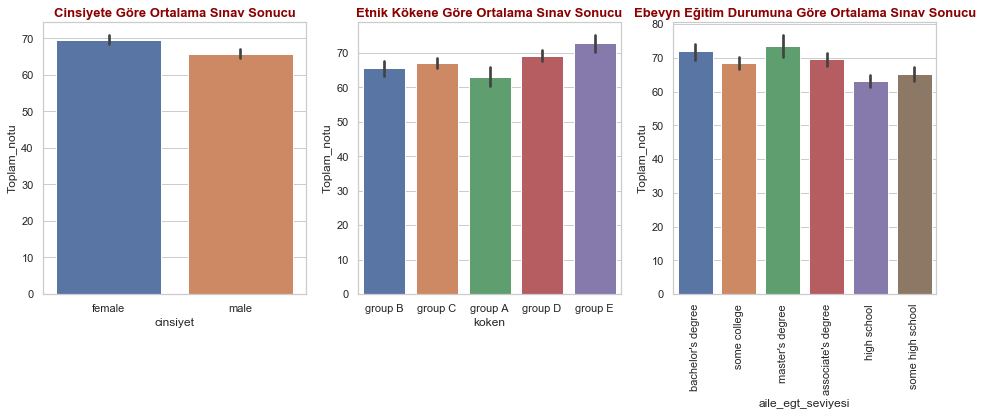

In [12]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.barplot(öğrenci_performans["cinsiyet"], öğrenci_performans["Toplam_notu"])
plt.title("Cinsiyete Göre Ortalama Sınav Sonucu", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(öğrenci_performans["koken"], öğrenci_performans["Toplam_notu"])
plt.title("Etnik Kökene Göre Ortalama Sınav Sonucu", fontdict = baslik_font)

plt.subplot(1,3,3)
chart=sns.barplot(öğrenci_performans["aile_egt_seviyesi"], öğrenci_performans["Toplam_notu"])
plt.title("Ebevyn Eğitim Durumuna Göre Ortalama Sınav Sonucu", fontdict = baslik_font )
plt.xticks(rotation="vertical")
plt.show()

# Ödev2
Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

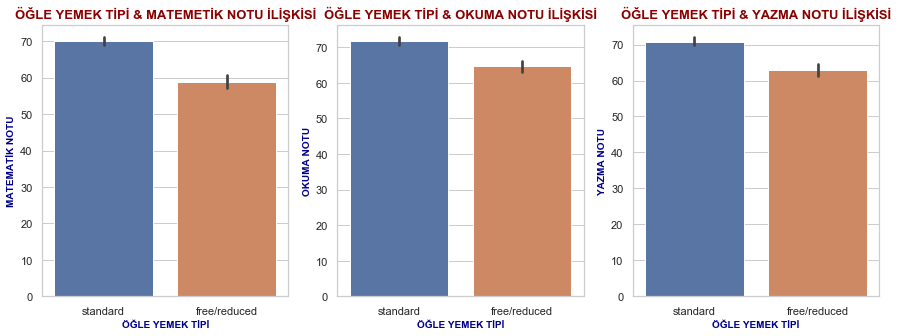

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(öğrenci_performans["ogle_yemegi"],öğrenci_performans["matematik_notu"])
plt.title("ÖĞLE YEMEK TİPİ & MATEMETİK NOTU İLİŞKİSİ", fontdict=baslik_font)
plt.xlabel("ÖĞLE YEMEK TİPİ", fontdict=eksen_font)
plt.ylabel("MATEMATİK NOTU", fontdict=eksen_font)

plt.subplot(1,3,2)
sns.barplot(öğrenci_performans["ogle_yemegi"],öğrenci_performans["okuma_notu"])
plt.title("ÖĞLE YEMEK TİPİ & OKUMA NOTU İLİŞKİSİ", fontdict=baslik_font)
plt.xlabel("ÖĞLE YEMEK TİPİ", fontdict=eksen_font)
plt.ylabel("OKUMA NOTU", fontdict=eksen_font)

plt.subplot(1,3,3)
sns.barplot(öğrenci_performans["ogle_yemegi"],öğrenci_performans["yazma_notu"])
plt.title("ÖĞLE YEMEK TİPİ & YAZMA NOTU İLİŞKİSİ", fontdict=baslik_font)
plt.xlabel("ÖĞLE YEMEK TİPİ", fontdict=eksen_font)
plt.ylabel("YAZMA NOTU", fontdict=eksen_font)

plt.show()


# Ödev3
Hazırlık kurslarının sınav performansı üzerinde bir etkisi var mı?

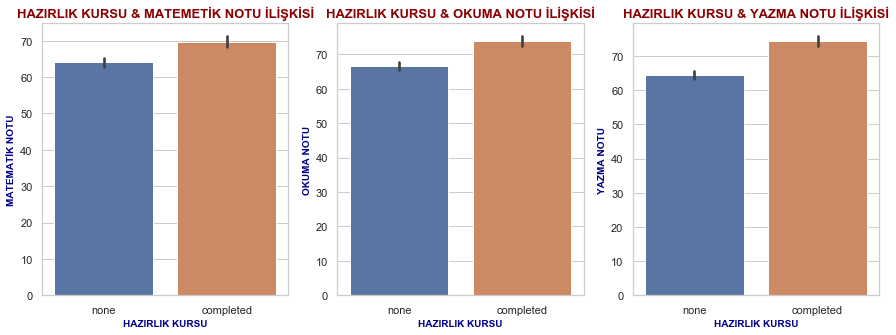

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(öğrenci_performans["hazirlik_kursu"],öğrenci_performans["matematik_notu"])
plt.title("HAZIRLIK KURSU & MATEMETİK NOTU İLİŞKİSİ", fontdict=baslik_font)
plt.xlabel("HAZIRLIK KURSU", fontdict=eksen_font)
plt.ylabel("MATEMATİK NOTU", fontdict=eksen_font)

plt.subplot(1,3,2)
sns.barplot(öğrenci_performans["hazirlik_kursu"],öğrenci_performans["okuma_notu"])
plt.title("HAZIRLIK KURSU & OKUMA NOTU İLİŞKİSİ", fontdict=baslik_font)
plt.xlabel("HAZIRLIK KURSU", fontdict=eksen_font)
plt.ylabel("OKUMA NOTU", fontdict=eksen_font)

plt.subplot(1,3,3)
sns.barplot(öğrenci_performans["hazirlik_kursu"],öğrenci_performans["yazma_notu"])
plt.title("HAZIRLIK KURSU & YAZMA NOTU İLİŞKİSİ", fontdict=baslik_font)
plt.xlabel("HAZIRLIK KURSU", fontdict=eksen_font)
plt.ylabel("YAZMA NOTU", fontdict=eksen_font)

plt.show()


# Ödev4
Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [18]:
öğrenci_performans.corr()

,matematik_notu,okuma_notu,yazma_notu,Toplam_notu
matematik_notu,1.000,0.818,0.803,0.919
okuma_notu,0.818,1.000,0.955,0.970
yazma_notu,0.803,0.955,1.000,0.966
Toplam_notu,0.919,0.970,0.966,1.000


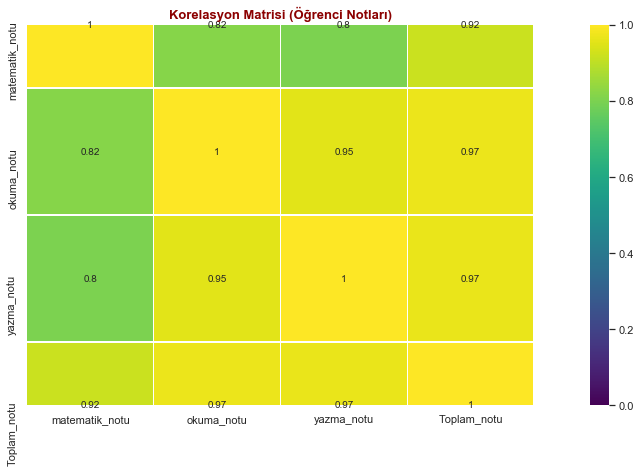

In [28]:
plt.figure(figsize=(20,7))

korelasyon_öğrenciler = öğrenci_performans.corr()
sns.heatmap(korelasyon_öğrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)", fontdict=baslik_font)

plt.show()